# Guía de inferencia bayesiana

Ejercicios relacionados con el [Notebook sobre Inferencia bayesiana](02_ProbabilidadInferencia.ipynb).

Los * indican ejercicios o preguntas particularmente desafiantes (¡pero no opcionales!).

In [3]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from math import *
from matplotlib import pylab as plt

### Ejercicio 1

a. Explicar este chiste

<img src="https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png"
     alt="Chiste XKCD"
     style="float: left; margin-right: 10px;" />


b. Escribir el teorema de Bayes para este problema y hacer un dibujo esquemático del prior y de la verosimilitud.

c. ¿Cómo cambiaría el remate del chiste si el detector tuviera 1000 dados en lugar de dos, y si solo mintiera en el caso en el que sale seis en todos ellos? (<b>opcional</b>: modificar el archivo de la imagen con el nuevo final, y postearlo con el hashtag #frec_bayes)

a. En este chiste nos encontramos con una máquina que mide si el sol está por explotar. A su vez, se nos dice que 
esa máquina antes de responder una pregunta tira dos dados, y que si ambos salen 6 nos mentirá en la respuesta que de. 
En la secuencia posterior nos encontramos con dos estadísticos que abordan el problema de diferente forma. Por un lado, el frecuentista. Este toma lo que la máquina le responde y hace estimaciones de probabilidad sobre eso. La probabilidad de que el aparato nos mienta ante la pregunta de si el sol ha explotado es de 1/36. Entonces el frecuentista frente a tan baja probabilidad de que la máquina haya mentido, cree que el sol ha explotado.
Por otro lado, el bayesiano no cree que esto sea así. Esto puede deberse a que muy posiblemente sus conocicimientos previos le hayan hecho saber que si el sol explotase ellos estarían muertos, o que los aparatos pueden ser imperfectos. Entonces, vemos que el Bayesiano aporta su conocimiento previo al resultado arrojado por la máquina y desestima lo que ella ha dicho.

b. Teorema de bayes.


$$
P( P = Explote  | M = Resultado) = \frac{P(M = Resultado | P = Explote) P(Explote)}{P(Resultado)}
$$

### Ejecicio 2

<b>Bayesian updating.</b> Considerar el ejemplo de los tests de una enfermedad que se presentó en el [notebook de probabilidad condicional](02p_Probabilidad_e_Inferencia.ipynb). Plantear el cálculo de la probabilidad frente a un segundo test considerando al resultado del primer test como prior. ¿Se obtiene el mismo resultado?

In [7]:
pE=0.001
pDE=0.99
pDnE=0.01

Queremos $P(E | D)$

Sabemos que:

1.   $P(E) = 0.001$
2.   $P(D|E) = 0.99$
3.   $P(D|\bar{E}) = 0.01 $

$P(E|I) + P(\bar{E}|I) = 1 $

$P(D|I) + P(\bar{D}|I) = 1 $

_Teorema de Bayes__:

$P(E|D)=\frac{P(D|E)P(E)}{P(D)}$

__Prior:__ $P(E)$
__Verosimilitud:__ $P(D|E)$
__Evidencia:__ $P(D)$
__Posterior:__ $P(E|D)$

__Regla de la Suma:__

$P(D) = P(D|E)p(E) + P(D|\bar{E})p(\bar{E})$

In [8]:
pD=pDE*pE+pDnE*(1-pE)
print("Probabilidad total de un test positivo: ", pD)

Probabilidad total de un test positivo:  0.01098


In [9]:
pED=pDE*pE/pD
print("Probabilidad de estar enfermo dado que dio un test positivo: ", pED)

Probabilidad de estar enfermo dado que dio un test positivo:  0.09016393442622951


__Falso positivo:__

$P(\bar{E}|D)=1-P(E|D)$

__Testear una segunda calcular:__

$P(E|D_{1}D_{2})=\frac{P(D_{1}D_{2}|E)P(E)}{p(D_{1}D_{2})}$

Utilizo indepndencia de los test:

$p(D_{1}D_{2}|E)=p(D_{2}|D_{1}E)p(D_{1}|E)$

Como $p(D_{2}|D_{1}E)=p(D_{2}|E)$

$p(D_{1}D_{2}|E)=p(D|E)^2$

$P(D_{1}D_{2})=P(D_{1}D_{2}|E)p(E)+P(D_{1}D_{2}|\bar{E})p(\bar{E})$

$P(D_{1}D_{2})=p(D|E)^{2}p(E)+p(D|\bar{E})^{2}p(\bar{E})$

__Ojo:__

$P(D_{1}D_{2})\neq P(D_{1})P(D_{2})$

__Actualizacion Bayesiana:__

$P(E|D_{2}D_{1})=\frac{P(D_{2}|ED_{1})P(E|D_{1})}{P(D_{2}|D_{1})}$

In [15]:
pD2 = (pDE**2) * pE + (pDnE ** 2) * (1-pE)
print(pD2)

0.00108


In [17]:
pED2=(pDE*pED)/pD2
print("Probabilidad de estar enfermo dado que 2 un test dieron positivo: ", pED2)

Probabilidad de estar enfermo dado que 2 un test dieron positivo:  82.65027322404372


### Ejercicio 3

Considerar una moneda de la que no se tiene ninguna información acerca de su estado. Es decir, no se sabe si la moneda está trucada, si cae preferentemente de un lado o del otro. Se quiere determinar la probabilidad, $\mu$, de que la moneda caiga de uno de los lados (digamos cara).

a. ¿Cuál sería un prior razonable para el parámetro $\mu$ dada esta información?

b. Se lanza la moneda N veces, y cae $c$ veces cara (C) y $e = N - c$ veces ceca (escudo, E). Escribir la función de verosimilitud para estos datos. ¿Qué función de distribución es la apropiada para modelar este proceso? ¿Cuál es el estimador de máxima verosimilitud, $\mu_{ML}$?

c. Si tomamos como prior una función uniforme, $Beta(1, 1)$, y dada la secuencia [E, E, C, E, C], calcular la posterior de $\mu$ y graficarla.

*d. Suponer ahora que en lugar de tratarse de una moneda completamente desconocida, supiéramos de alguna manera que el prior para $\mu$ es $P(\mu) = N(0.5, 0.02)$, donde $N$ es la distribución normal:
<ol>
    <li>Calcular y graficar la distribución posterior para el mismo set de datos del punto <em>c</em>.</li>
    <li>Inventar un set de resultados del experimento de lanzar la moneda que conduzcan a una posterior que permita refutar el prior.</li>
    </ol>

a. Para esta información un prior razonable sería uno que no contenga información. Podríamos usar una distribución uniforme.

b.

$ N = veces $

$ C = cara$

$ E = escudo  /   N - C$



En mi experimento me encuentro con que se tira una moneda N veces. Los resultados de esas tiradas puede ser Cara o Escudo, es decir, sólo cuento con dos resultados posibles para cada tirada. Suponiendo que cada tirada es independiente la una de la otra y que la probabilidad (p) de ocurrencia en los ensayos se mantiene constante, podemos adoptar la distribución binomial para plantear nuestra función de verosimilitud.

$P(C\text{ (cara)} |N \text{ (tiradas)}, \mu_{} )=\text{Bin}(C | N,\mu_{})$

El estimador de máxima versosimilitud valor de $\mu_{}$ que maximiza la función de verosimilitud.Es decir, en este caso tenemos que ese valor será aquel que mejor explique la forma en que los datos han salido.



c. 
$Beta(1, 1)$

Resultados =  [E, E, C, E, C]

 ¿Posterior de $\mu_{}$?

In [39]:
N = 5
C = 2
E = 3
Pc = C/N
Pe = 1 - Pc

print(Pc)
print(Pe)


0.4
0.6


Esto se puede hacer analiticamente si su verosimilitud y su prior son conjugados, por ejemplo Beta$(1,1)\times$Binomial(X positivos de N intentos) ~ Beta(1+X, 1+N-X)._


__Los incorporo junto a mi prior y obtengo el posterior:__

$p(\mu_{}| C ,N) =\frac{p(C | N,\mu_{})p(\mu_{})}{p(C|N)}$

Gracias a las propiedades del prior conjugado _para mi eleccion de prior_

$p(\mu_{}|C,N)=\text{Beta}(\mu_{}|1+C,1+N-C)$

In [56]:
plt.plot?

Text(0.5, 0, '$\\mu$')

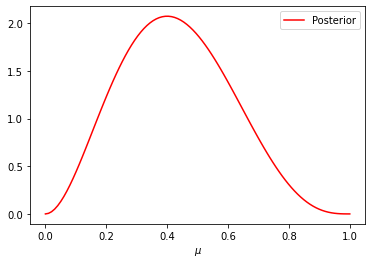

In [62]:
from scipy.stats import binom, beta, uniform, norm, bernoulli, dirichlet
mu = np.linspace(0,1,100)
posterior = beta(1 + C, 1 + N - C)
plt.plot(mu, posterior.pdf(mu), color = 'r', label ='Posterior')
plt.legend(loc='upper right')
plt.xlabel('$\mu$')

In [84]:
binomial = binom.pmf(2,5, mu)

Text(0.5, 0, 'mu / probabilidad de éxito')

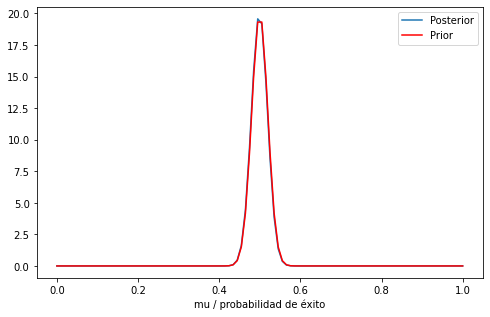

In [85]:
#d.

likelihook = binomial
prior=norm(loc=0.5,scale=0.02).pdf(mu)
posterior_2 = likelihook * prior

plt.figure(figsize=(8, 5))
plt.plot(mu, posterior_2/ np.sum(posterior_2 * np.diff(mu)[0]), label='Posterior')
plt.plot(mu, prior, color='r', label='Prior')
plt.legend(loc=0)
plt.xlabel('mu / probabilidad de éxito')



Text(0.5, 0, 'mu / probabilidad de éxito')

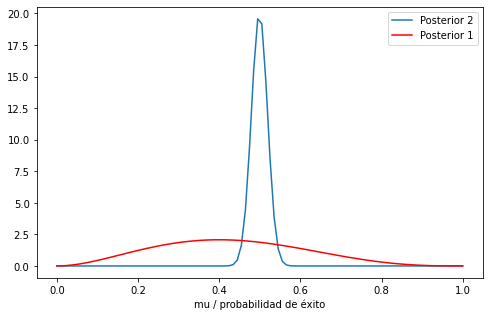

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(mu, posterior_2/ np.sum(posterior_2 * np.diff(mu)[0]), label='Posterior 2')
plt.plot(mu, likelihook , color='r', label='Posterior 1')
plt.legend(loc=0)
plt.xlabel('mu / probabilidad de éxito')


d.2)Inventar un set de resultados del experimento de lanzar la moneda que conduzcan a una posterior que permita refutar el prior.

In [102]:
mu_v = 0.1
np.random.seed(20200813)
datos = np.where(np.random.rand(1000) < mu_v, 1, 0)
print(datos)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 

In [104]:
datos = datos.tolist()

In [105]:
C = datos.count(1) 
E = datos.count(0)
print(E)

899


Text(0.5, 0, 'mu / probabilidad de éxito')

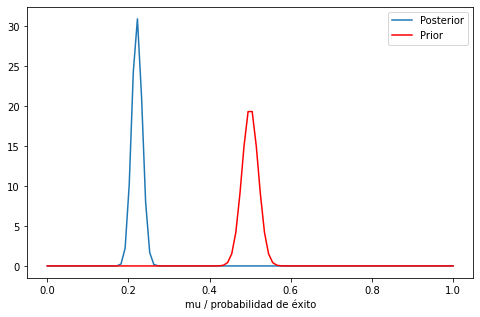

In [106]:
binomial = binom.pmf(C,len(datos), mu)
likelihook = binomial
prior=norm(loc=0.5,scale=0.02).pdf(mu)
posterior_2 = likelihook * prior

plt.figure(figsize=(8, 5))
plt.plot(mu, posterior_2/ np.sum(posterior_2 * np.diff(mu)[0]), label='Posterior')
plt.plot(mu, prior, color='r', label='Prior')
plt.legend(loc=0)
plt.xlabel('mu / probabilidad de éxito')


### Ejercicio 4:

Supongamos que uno esta aburrido en una reunion con N personas y se quiere divertir. En ese caso, puede tratar de responder las siguientes preguntas:

a. ¿Cuál es la probabilidad de entre esas N personas haya al menos 2 que cumplen el mismo día?

b) Sabiendo esto, elije una persona al azar, y cumple el 3 de Marzo. ¿Qué probabilidad hay de que eligiendo otra persona al azar, esta cumpla el mismo día?

c. ¿Si en medio de la discusion entra otra persona al evento, que probabilidad tiene de cumplir el mismo día que alguno de los participantes?

d. Supongamos que usted es un desvelado y no sabe en que planeta está. Una manera de comprobarlo es ver si al menos 2 personas de los N participantes cumplen el mismo día. Sabiendo esto, ¿cómo inferiria cuánto dura el año en ese planeta? <b>Tip:</b> Utilicé la verosimulitud y el posterior.


### Ejercicio 5:
Te contratan como diseñador de sitios web para una prestigiosa revista amarillista. Tu principal tarea es rediseñar el sitio para obtener más suscriptores. Luego de retoques y maquillajes, crees que esta lista, pero antes de hacerla oficial tu jefe quiere que realices un experimento para estimar qué tanto mejor (si es que lo es en absoluto) es tu diseño, respecto al anterior. 

Se realiza el siguiente experimento: Al 20% de los visitantes se les muestra tu novedoso diseño (diseño A) mientras que al resto se les muestra el diseño original (diseño B). Luego de un mes, cuentas con los siguientes datos:

|Sitio:|A|B|
|---|---|---|
|Cantidad de visitantes  | 14 400  | 57 600  |
|Cantidad de suscriptores| 20  |  68 |

a. Modele la probabilidad $p$ de que un visitante al sitio web se suscriba a la revista (i.e. la _Verosimilitud_ o _Likelihood_). ¿Qué distribución utilizaría y porqué?

Utilizaría la binomial, ya que por cada caso (A o B) tengo sólo dos resultados (que se suscriba o que no).

__Likelihood:__

$p_{A,B} = p(k_{A,B}\text{ suscriptores} |N_{A,B} \text{ visitantes}, \mu_{A,B})=\text{Bin}(k_{A,B}|N_{A,B},\mu_{A,B})$

b. Si llamamos $p_A$ y $p_B$ a dichas probabilidades cuando el visitante es mostrado el diseño A o el diseño B, modele la confianza que tiene en los valores de $p_A$ y $p_B$ antes de realizar el experimento (i.e. el _prior_). ¿Qué distribución usa?

Tanto $\mu_{A}$ como $\mu_{B}$ pueden tomar cualquier valor en [0,1]. Como no conozco nada, tomo
$p(\mu_{A,B}) = \text{Uniforme}=\text{Beta}(\mu_{A,B}|\alpha_{1}=1,\alpha_{2}=1)$

c. Utilice el Teorema de Bayes para estimar la confianza que tiene en los parámetros $p_A$ y $p_B$ luego de realizar el experimento (i.e. el _posterior_). Grafíquelas en función del valor de p.

Ayuda: Esto se puede hacer analiticamente si su verosimilitud y su prior son conjugados, por ejemplo Beta(1,1)*Binomial(X positivos de N intentos) ~ Beta(1+X, 1+N-X).

In [108]:
NA=14400
kA=20
NB=57600
kB=68

In [110]:
MLA=print(kA/NA)
MLB=print(kB/NB)

0.001388888888888889
0.0011805555555555556


__Los incorporo junto a mi prior y obtengo el posterior:__

$p(\mu_{A,B}|k_{A,B},N_{A,B})=\frac{p(k_{A,B}|N_{A,B},\mu_{A,B})p(\mu_{A,B})}{p(k_{A,B}|N_{A,B})}$

Gracias a las propiedades del prior conjugado _para mi eleccion de prior_

$p(\mu_{A,B}|k_{A,B},N_{A,B})=\text{Beta}(\mu_{A,B}|1+k_{A,B},1+N_{A,B}-k_{A,B})$

Text(0.5, 0, '$\\mu$')

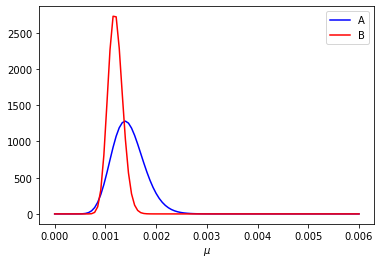

In [112]:
mu=np.linspace(0,0.006,100)
posteriorA=beta(1+kA,1+NA-kA)
plt.plot(mu,posteriorA.pdf(mu),color='blue',label='A')
posteriorB=beta(1+kB,1+NB-kB)
plt.plot(mu,posteriorB.pdf(mu),color='red',label='B')
plt.legend(loc='upper right')
plt.xlabel('$\mu$')

d. ¿Cual es la probabilidad de que el diseño A sea mejor que el B? (Recuerde que un 50% quiere decir que son estadisticamente iguales)

__Opción A:__

$Estimadores$

__Media:__


In [114]:
print("La media de posteriorA es: %.6f" % (posteriorA.mean()))

La media de posteriorA es: 0.001458


In [115]:
print("La media de posteriorB es: %.6f" % (posteriorB.mean()))

La media de posteriorB es: 0.001198


La diferencia entre ambas:

In [123]:
(posteriorA.mean()-posteriorB.mean())/posteriorB.mean()

0.21726451036389857

__Mediana:__

In [125]:
print("La mediana de posteriorA es: %.6f" % (posteriorA.median()))

print("La mediana de posteriorB es: %.6f" % (posteriorB.median()))

#La diferencia entre ambas:

(posteriorA.median()-posteriorB.median())/posteriorB.median()

La mediana de posteriorA es: 0.001435
La mediana de posteriorB es: 0.001192


0.20385056314467778

__Opción B__:

Usando todo el posterior:

In [139]:
sample_size = 1000
sample_A = posteriorA.rvs(sample_size)
#print(sample_A)
sample_B = posteriorB.rvs(sample_size)

print((sample_A>sample_B).mean())

0.79


e. Si el sitio cuenta con un promedio de 5 millones de visitas anuales, ¿cuánto estima que será el incremento en los suscriptores el proximo año debido a usar el diseño nuevo en vez del original?

El incremento en suscriptores va a venir de  considerar $p(k \text{ subscriptores}|5\cdot10^6 \text{ visitantes},\text{sitio web}_{A,B})$

$p(k|N,\text{web}_{A,B})=\int p(k|N,\mu)p(\mu|\text{web}_{A,B}) d\mu$

$p(\mu|\text{web}_{A,B})$ son los posteriors que obtuvimos antes.

__Primer aproximacion:__

Aproximo $p(\mu|web_{A,B})$ por $\delta(\mu_{A,B}-\hat{\mu}_{A,B})$

$p(k|N,\text{web}_{A,B})= p(k|N,\hat{\mu}_{A,B})$


In [140]:
estimador_A=posteriorA.mean()
estimador_B=posteriorB.mean()
N=5000000
probA=binom(N,p=estimador_A)
probB=binom(N,p=estimador_B)
print((probA.mean(),probB.mean()))

(7290.654075822802, 5989.3753689108025)


__Segunda aproximacion:__

Sampleo adecuadamente y tengo

$p(k|N,\text{web}_{A,B})=\frac{1}{M}\sum_{i=1}^{M}p(k|N,\mu_{i})$

Se que $E[k]=N\mu$ para un $\mu$ fijo

$E[k]=\frac{1}{M}\sum_{i=1}^{M}\sum_{k=0}^{N}p(k|N,\mu_{i})=\frac{1}{M}\sum_{i=1}^{M}N\mu_{i}$

In [141]:
sample_size=10000
sample_A=posteriorA.rvs(sample_size)
sample_B=posteriorB.rvs(sample_size)
print((binom(N,sample_A).mean()).mean())
print((binom(N,sample_B).mean()).mean())
print((N*sample_A).mean())
print((N*sample_B).mean())

7282.789088306083
5990.912941547606
7282.789088306083
5990.912941547606


### Ejercicio 6:


Supongamos que has diseñado un nuevo test para una enfermedad. Ahora hay que caracterizarlo. Para esto, se suele subdividir el espacio de posibilidades en 4:

*   Verdadero Positivo: El test da positivo en un paciente enfermo.
*   Falso Positivo: El test da positivo en un paciente sano.
*   Verdadero Negativo: El test da negativo en un paciente sano
*   Falso Negativo: El test da negativo en un paciente enfermo.

Dado que cualquier paciente puede estar o sano o enfermo, y que el test solo puede dar positivo o negativo, estos cuatro eventos completan el espacio de posibilidades y son excluyentes. De este modo se caracteriza el test con las probabilidades de cada uno de estos eventos.

1.  ¿Como modelaría estas probabilidades? ¿Qué distribución de probabilidad le parece apropiada?







**Respuesta:** ...

El espacio de muestreo tiene dimension 4:

$S=(TP,FP,TN,FN)$

Sampleo $N$ veces un paciente testeado. Cual es la probabilidad de tener $k_{1}$ TP, $k_{2}$ FP, $k_{3}$ TN y $k_{4}$ FN? Es la Multinomial

$\text{Multi}(k_{1},k_{2},k_{3},k_{4}|N,\mu_{1},\mu_{2},\mu_{3},\mu_{4})=\frac{N!}{k_{1}!k_{2}!k_{3}!k_{4}!}\mu_{1}^{k_{1}}\mu_{2}^{k_{2}}\mu_{3}^{k_{3}}\mu_{4}^{k_{4}}$

$k_{1}+k_{2}+k_{3}+k_{4}=N$

$\mu_{1}+\mu_{2}+\mu_{3}+\mu_{4}=1$

2.  En el archivo `datasets/clinical_trials.csv` se encuentran los resultados de las pruebas médicas realizadas. A partir de ellos, y asumiendo ningún conocimiento previo (prior uniforme), realice inferencia Bayesiana sobre las probabilidades del modelo. Grafique los posteriors correspondientes, y reporte un valor (estimador) para ellos. Justifique porque eligió dicho estimador. <b>Hint:</b> No hay una única respuesta adecuada.

In [ ]:
#Si estas en Colab, ejecuta esto primero:
!mkdir datasets
!wget https://raw.githubusercontent.com/IAI-UNSAM/ML-UNSAM/master/datasets/clinical_trials.csv
!mv clinical_trials.csv datasets/clinical_trials.csv

In [145]:
from scipy.stats import dirichlet
import pandas as pd

In [146]:
df = pd.read_csv('datasets/clinical_trials.csv', index_col='PatientID')
df.head()

,TruePositive,FalsePositive,TrueNegative,FalseNegative
PatientID,,,,
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [147]:
alphas = df.sum(axis=0)
print(alphas)
alphas = np.array(alphas)

TruePositive       45
FalsePositive     430
TrueNegative     4499
FalseNegative      26
dtype: int64


Mi teorema de Bayes:

$p(\mu_1,\mu_2,\mu_3,\mu_4|N,k_1,k_2,k_3,k_4)=\frac{p(k_1,k_2,k_3,k_4|N,\mu_1,\mu_2,\mu_3,\mu_4)p(\mu_1,\mu_2,\mu_3,\mu_4)}{p(k_1,k_2,k_3,k_4|N)}$

Yo se la verosimilitud:
$p(\mu_1,\mu_2,\mu_3,\mu_4|N,k_1,k_2,k_3,k_4)=\frac{\text{Multi}(k_1,k_2,k_3,k_4|N,\mu_1,\mu_2,\mu_3,\mu_4)p(\mu_1,\mu_2,\mu_3,\mu_4)}{p(k_1,k_2,k_3,k_4|N)}$

Voy a tomar prior uniforme dado que no tengo conocimiento sobre los $\mu$. Tomo la generalizacion de la Beta, la distribucion de Dirichlet.

$\text{Dirichlet}(\mu_{1},\mu_{2},\mu_{3},\mu_{4}|\alpha_{1},\alpha_{2},\alpha_{3},\alpha_{4})$

Esta definida sobre un espacio K-1 dimensional. Siempre que samplee se va a cumplir que $\sum_{i=1}^{K}\mu_{i}=1$.

En particular Dirichlet(1,1,1,...,1) es la distribucion uniforme.

In [148]:
from scipy.stats import dirichlet
prioruniforme=dirichlet(alpha=[1,1,1,1])
mu=prioruniforme.rvs(10)
print(mu)
print(np.sum(mu,axis=1))

[[0.37065321 0.27246156 0.12120541 0.23567981]
 [0.25240613 0.48123828 0.16078059 0.105575  ]
 [0.16988162 0.07247148 0.67830141 0.07934549]
 [0.31161478 0.15509764 0.2789466  0.25434097]
 [0.38660272 0.53756953 0.05451571 0.02131204]
 [0.39500871 0.14626364 0.09650935 0.3622183 ]
 [0.55710182 0.25467807 0.0297629  0.15845721]
 [0.20836782 0.17538558 0.33033359 0.28591301]
 [0.00421593 0.33366221 0.21324585 0.44887601]
 [0.11848664 0.1364203  0.43445826 0.3106348 ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


El posterior sera $\text{Dirichlet}(\alpha_{1}+k_{1},\alpha_{2}+k_{2},\alpha_{3}+k_{3},\alpha_{4}+k_{4})$

In [149]:
posterior=dirichlet(alpha=alphas+np.ones(4))

Como estimador puedo considerar la media

In [152]:
promedios=posterior.mean()

Para graficar, tengo un problema y es que tengo demasiadas dimensiones.

Puedo marginalizar para plottear.

$p(\mu_{1})=\int p(\mu_1,\mu_2,\mu_3,1-\mu_1-\mu_2-\mu_3)d\mu_2 d\mu_3$

Numericamente:

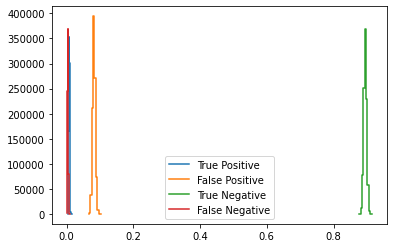

In [154]:
sample_size = 100**3 #el espacio tiene 3 dimensiones, de esta forma tenemos approx mil por dimension

samples = posterior.rvs(size=sample_size)

histogram, bins = np.histogramdd(samples)

plt.step(bins[0][:-1], histogram.sum(axis=(1,2,3)), label ='True Positive')
plt.step(bins[1][:-1], histogram.sum(axis=(0,2,3)), label ='False Positive')
plt.step(bins[2][:-1], histogram.sum(axis=(0,1,3)), label ='True Negative')
plt.step(bins[3][:-1], histogram.sum(axis=(0,1,2)), label ='False Negative')
plt.legend()

3. Usted se realiza dicho test y da positivo. Utilizando la información anterior ¿Cuál es la probabilidad de que estés enfermo?

**DATO:** En la muestra de los resultados anteriores, la población enferma estaba sobrerepresentada para obtener una mejor estimación de falsos negativos y verdaderos positivos. Suponga que la probabilidad real de que alguien en su condición tenga la enfermedad es del 0.1%.

Mi posterior modela las probabilidades ($\mu_{1}, \mu_{2},\mu_{3},\mu_{4}$).

$\mu_{1}$ representa $p(+|E)$, $\mu_{2}$ representa $p(+|\bar{E})$, $\mu_{3}$ representa $p(-|\bar{E})$, $\mu_{4}$ representa $p(-|E)$.

$p(E|+)=\frac{p(+|E)p(E)}{p(+)}$

$p(E)=0.001$

$p(+)=p(+|E)p(E)+p(+|\bar{E})p(\bar{E})$
Opciones:

- Utilizo un estimador $p(+|E)=\hat{\mu_{1}}$ (media, mediana, maximo etc. de la Posterior $p(\mu_{1},\mu_{2},\mu_{3},\mu_{4}|\text{datos})$




In [157]:
promedios=samples.mean(axis=0)
print(promedios)
TP = promedios[0]
FP = promedios[1]
pE = 0.001

evidence = ( FP *(1-pE) + TP * pE )

P_estoy_enfermo = TP * pE / evidence
print("Probabilidad de que este enfermo: {:.5f}%".format(P_estoy_enfermo*100))

[0.00919362 0.08612916 0.89927999 0.00539723]
Probabilidad de que este enfermo: 0.01068%


4.  (*) ¿Cambia el resultado anterior si utilizas las distribuciones de posterior en lugar de los estimadores escogidos? ¿Porqué?

- Utilizo todo el posterior $p(+|E)=\int \mu_{1} p(\mu_{1},\mu_{2},\mu_{3},1-\mu_{1}-\mu_{2}-\mu_{3}|\text{datos})d\mu_{1}d\mu_{2}d\mu_{3}=<\mu_{1}>$


$<\mu_{1}>^{p}$ no necesariamente coincide con $<\mu_{1}^{p}>$

In [164]:
samples.shape

(1000000, 4)

In [159]:
TP = samples[:,0]
FP = samples[:,1]
pE = 0.001

evidence = ( FP *(1-pE) + TP * pE )

P_estoy_enfermo_2 = TP * pE / evidence
print("Probabilidad de que este enfermo: {:.5f}%".format(P_estoy_enfermo_2.mean()*100))

Probabilidad de que este enfermo: 0.01071%


### Ejercicio 7:

Supongamos que uno entra a un laboratorio de partículas abandonado, buscando material fisible para alimentar su Delorean. Encuentra un bloque de medio kilo pero tiene tres etiquetas que indican tres vidas medias distintas para ese bloque de medio kilo: 1 decaimiento cada 10 minutos, 1 cada media hora y otro cada 45 minutos. Dado que no sabemos nada, podemos pensar que la probabilidad de que cada etiqueta sea la correcta es 1/3. Para cada etiqueta, la probabilidad de observar $N$ decaimientos en un tiempo $T$ esta definido por una distribucion de Poisson $\frac{(rT)^{N}e^{-rT}}{N!}$, donde $r$ es la tasa de decaimientos por unidad de tiempo (distinta para cada etiqueta).

Si ahora coloco un detector frente al material y mido, que puedo decir si observo:

a) 1 partícula emitida en un intervalo de 5 minutos.

b) 2 partículas emitidas en un intervalo de media hora.

c) 1 partícula emitida en un intervalo de 1 hora.

d) 25 partículas emitidas durante tres horas.

e) 10 partículas emitidas en un intervalo de 2 horas.

En base a esto, ¿es mejor medir durante mucho o poco tiempo?